# HESG Data usage - 1 - room temperature

## Introduction

This notebook is part of the HESG Data Usage package. Please refer to the whole repository available here:  
https://gitlab.com/es-catapult-ds/hesg-data-examples

Please refer to this repository for the license, python packages requirement and how to access data.

## Content of this notebook

This notebook shows an example of how access and use the HESG Data to display the observed temperature is a specific room of a specific household.

It is assumed that the following files are in the working directory:
- eden1homemodel.csv
- eden1sensor.csv

## 1. Import the libraries

In [1]:
# CSV files are loaded with pandas
import pandas as pd

# plotting is done with matplotlib
import matplotlib.pyplot as plt
# this jupyter notebook command enables interactive plotting
%matplotlib notebook
# remove SettingWithCopyWarning warning message to avoid distraction
pd.set_option('mode.chained_assignment', None)

## 2. Load "homemodel"

"homemodel" contains the information needed to understand the content of each household (what are the rooms, what is recorded in each room, ...).

In [2]:
# load the csv file
df_homemodel = pd.read_csv("./eden1homemodel.csv")
# display the content for illustrative purpose
#  for house id = 47 only
df_homemodel[df_homemodel["houseid"] == 47]

houseid  networkid  hubid  \
218       47          4     48   
219       47          5     48   
220       47          6     48   
221       47          7     48   
222       47          8     48   
223       47          9     48   
224       47         10     48   
225       47         11     48   
226       47         12     48   
227       47         13     48   
228       47         14     48   
229       47         15     48   
230       47         16     48   
231       47         17     48   
232       47         18     48   
233       47         19     48   
234       47         20     48   
235       47         22     48   
236       47         23     48   
237       47         25     48   
238       47         26     48   
239       47         27     48   
240       47         28     48   
241       47         29     48   
242       47         30     48   
243       47         31     48   
244       47         32     48   
245       47         33     48   
246       47         34     48   
247       47         35     48   
248       47         36     48   
249       47         37     48   
250       47         38     48   
251       47         39     48   
252       47         40     48   
253       47         41     48   
254       47         42     48   
255       47         44     48   
256       47         48     48   

                                              roomname           roomtype  \
218  198b10d1babe574a2225968c49715917d980911b0c8964...                NaN   
219  198b10d1babe574a2225968c49715917d980911b0c8964...                NaN   
220  198b10d1babe574a2225968c49715917d980911b0c8964...                NaN   
221  198b10d1babe574a2225968c49715917d980911b0c8964...                NaN   
222  296d0bb862da8169fba898722f3d328caf7bf5499804cc...             Lounge   
223  296d0bb862da8169fba898722f3d328caf7bf5499804cc...             Lounge   
224  a978bb17016a176d703c6c0d24b223b04bccba6162600b...   Kitchen & Dining   
225  f07404bf194286195789cebfc096e13a4aa06092bdad9b...   Kitchen & Dining   
226  d69511b0b431316158a3d3d23b444a60e0e64dcc7c618a...  Laundry & Utility   
227  cb089818e5e465ab4bd7ad6d00bb38427c798617c77707...            Default   
228  593c06a325753eba0414228370b1922cad50339f4cb939...          Bathrooms   
229  3b38ab55ee7108eefa3d53f227181d15f545efccdf214e...        Work & Play   
230  19962473a003cb5c8860dbc0ed4701d0dd49a37522fe1c...        Work & Play   
231  d03f8418ccc172be0b8445ed825105d0776460cda7371f...          Bathrooms   
232  a09844d23a0644aac584293954910fdd5f880074cff576...           Bedrooms   
233  e0452dec49d802d83e78d5e4d89fafdda6f64535d793dd...        Work & Play   
234  296d0bb862da8169fba898722f3d328caf7bf5499804cc...             Lounge   
235  a978bb17016a176d703c6c0d24b223b04bccba6162600b...   Kitchen & Dining   
236  f07404bf194286195789cebfc096e13a4aa06092bdad9b...   Kitchen & Dining   
237  cb089818e5e465ab4bd7ad6d00bb38427c798617c77707...            Default   
238  593c06a325753eba0414228370b1922cad50339f4cb939...          Bathrooms   
239  49196376647aa1d14a0c6671bc4d43ec6c49b25db33d98...            Default   
240  3b38ab55ee7108eefa3d53f227181d15f545efccdf214e...        Work & Play   
241  19962473a003cb5c8860dbc0ed4701d0dd49a37522fe1c...        Work & Play   
242  d03f8418ccc172be0b8445ed825105d0776460cda7371f...          Bathrooms   
243  a09844d23a0644aac584293954910fdd5f880074cff576...           Bedrooms   
244  e0452dec49d802d83e78d5e4d89fafdda6f64535d793dd...        Work & Play   
245  d69511b0b431316158a3d3d23b444a60e0e64dcc7c618a...  Laundry & Utility   
246  296d0bb862da8169fba898722f3d328caf7bf5499804cc...             Lounge   
247  296d0bb862da8169fba898722f3d328caf7bf5499804cc...             Lounge   
248  a978bb17016a176d703c6c0d24b223b04bccba6162600b...   Kitchen & Dining   
249  d69511b0b431316158a3d3d23b444a60e0e64dcc7c618a...  Laundry & Utility   
250  cb089818e5e465ab4bd7ad6d00bb38427c798617c77707...            Default   
251  3b38ab55ee7108eefa3d5

In [3]:
# display the different kind of room type
# for illustration only
df_homemodel["roomtype"].drop_duplicates().tolist()

['Work & Play',
 'Bedrooms',
 'Lounge',
 'Kitchen & Dining',
 nan,
 'Bathrooms',
 'Default',
 'Storage Rooms',
 'Laundry & Utility']

In [4]:
# display the list of house id present in the current eden
# for illustration only
list_houses = df_homemodel["houseid"].drop_duplicates().tolist()
list_houses

[10, 17, 63, 31, 123, 24, 38, 76, 47]

## 2. Load "sensor"

This dataset contains the timestamp and values for the different sensors in the different house id / room id.

**Only the 1'000'000 lines are being loaded.** For a proper analysis, you will need to load everything, or to filter during loading as done in the point 5.

**Please be aware that depending of the way you have extracted eden1sensor, the content may be different.** It can mean that the specific example (houseid 17. roomid Bathrooms0) may not exist in the dataset you have loaded.

In [5]:
# Load the csv
df_sensor = pd.read_csv("./eden1sensor.csv", nrows=1000000)
# display the content for illustrative purpose
df_sensor

/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,5,6,9,12,14,15,19,20,21,25,27,32,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


houseid                                             roomid  \
0            24  0b43d481444c1dcdc7971cc99f8ecd658d0587a4fff310...   
1            24  0b43d481444c1dcdc7971cc99f8ecd658d0587a4fff310...   
2            24  0b43d481444c1dcdc7971cc99f8ecd658d0587a4fff310...   
3            24  0b43d481444c1dcdc7971cc99f8ecd658d0587a4fff310...   
4            24  0b43d481444c1dcdc7971cc99f8ecd658d0587a4fff310...   
...         ...                                                ...   
999995       76  10fde831cde6ad37a7c703e93ff5df339803b543d0b5b6...   
999996       76  10fde831cde6ad37a7c703e93ff5df339803b543d0b5b6...   
999997       76  10fde831cde6ad37a7c703e93ff5df339803b543d0b5b6...   
999998       76  10fde831cde6ad37a7c703e93ff5df339803b543d0b5b6...   
999999       76  10fde831cde6ad37a7c703e93ff5df339803b543d0b5b6...   

                     sensortimestamp boilerdatastatus  boilernetworkid  \
0       2018-09-30 23:59:00.000+0000              NaN              NaN   
1       2018-10-01 00:00:00.000+0000              NaN              NaN   
2       2018-10-01 00:01:00.000+0000              NaN              NaN   
3       2018-10-01 00:02:00.000+0000              NaN              NaN   
4       2018-10-01 00:03:00.000+0000              NaN              NaN   
...                              ...              ...              ...   
999995  2019-02-19 15:15:00.000+0000              NaN              NaN   
999996  2019-02-19 15:16:00.000+0000              NaN              NaN   
999997  2019-02-19 15:17:00.000+0000              NaN              NaN   
999998  2019-02-19 15:18:00.000+0000              NaN              NaN   
999999  2019-02-19 15:19:00.000+0000              NaN              NaN   

       boilerswitchonoff boilertimestamp  coldwaterboxhumidity  \
0                    NaN             NaN                   NaN   
1                    NaN             NaN                   NaN   
2                    NaN             NaN                   NaN   
3                    NaN             NaN                   NaN   
4                    NaN             NaN                   NaN   
...                  ...             ...                   ...   
999995               NaN             NaN                   NaN   
999996               NaN             NaN                   NaN   
999997               NaN             NaN                   NaN   
999998               NaN             NaN                   NaN   
999999               NaN             NaN                   NaN   

        coldwaterboxtemperature coldwaterdatastatus  ...  roomtemperature  \
0                           NaN                 NaN  ...            15.89   
1                           NaN                 NaN  ...            15.90   
2                           NaN                 NaN  ...            15.89   
3                           NaN                 NaN  ...            15.88   
4                           NaN                 NaN  ...            15.88   
...                         ...                 ...  ...              ...   
999995                      NaN                 NaN  ...              NaN   
999996                      NaN                 NaN  ...            16.79   
999997                      NaN                 NaN  ...            16.81   
999998                      NaN                 NaN  ...            16.81   
999999                      NaN                 NaN  ...            16.83   

                       roomtimestamp   roomtype  roomvolume wrvdatastatus  \
0       2018-09-30 23:59:59.000+0000  Bathrooms        14.0           NaN   
1       2018-10-01 00:00:58.000+0000  Bathrooms        14.0        normal   
2       2018-10-01 00:01:58.000+0000  Bathrooms        14.0           NaN   
3       2018-10-01 00:02:58.000+0000  Bathrooms        14.0           NaN   
4       2018-10-01 00:03:58.000+0000  Bathrooms        14.0           NaN   
...                              ...        ...         ...           ...   
999995               

In [6]:
# display the column names
# for illustration only
df_sensor.columns

Index(['houseid', 'roomid', 'sensortimestamp', 'boilerdatastatus',
       'boilernetworkid', 'boilerswitchonoff', 'boilertimestamp',
       'coldwaterboxhumidity', 'coldwaterboxtemperature',
       'coldwaterdatastatus', 'coldwaternetworkid', 'coldwaterpipetemperature',
       'coldwatertimestamp', 'day', 'electricitymeterdatastatus',
       'electricitymeterismetric', 'electricitymeternetworkid',
       'electricitymeterpulses', 'electricitymeterreading',
       'electricitymetertimestamp', 'gasmeterdatastatus', 'gasmeterismetric',
       'gasmeternetworkid', 'gasmeterpulses', 'gasmeterreading',
       'gasmetertimestamp', 'hotwaterboxhumidity', 'hotwaterdatastatus',
       'hotwaterflowtemp', 'hotwaterinletpipetemp', 'hotwaternetworkid',
       'hotwaterreturn', 'hotwatertimestamp', 'hotwaterwatertemp', 'hours',
       'minutes', 'month', 'radiator1boxhumidity', 'radiator1boxtemp',
       'radiator1datastatus', 'radiator1networkid', 'radiator1surfacetemp',
       'radiator1timestamp'

In [7]:
# display the available house id in this dataset
# for illustration only
df_sensor["houseid"].drop_duplicates().tolist()

[24, 76, 47, 17, 38, 123, 31]

## 3. select one house

To illustrate how to access data, only one house is selected.

In [8]:
# 17 is a good choice because the small sample used contains several rooms
houseid = 17
df_sensor_selected = df_sensor[df_sensor["houseid"] == houseid]
df_homemodel_selected = df_homemodel[df_homemodel["houseid"] == houseid]

In [9]:
# rename the rooms with a better name
# instead of something like
# "17552a0179f742b8c31dd3e400a9bc469e92f9fa98fdebc43ad461fccb815e8e"
# we are going to rename it as something like
# "WorkPlay0"
# based on the room type

# we add a count in case two rooms have the same roomtype

df_rooms = df_homemodel_selected.groupby("roomname").first()
df_rooms["roomtype_indice"] = df_rooms.groupby("roomtype").cumcount()
df_rooms["roomname2"] = (df_rooms["roomtype"].astype(str).str.replace(" & ", "")
                         + df_rooms["roomtype_indice"].astype(str))
df_rooms = df_rooms[["roomname2"]]
# df_rooms is the table that show the translation
print("translation table:")
print(df_rooms)

# apply the renaming
df_homemodel_selected = df_homemodel_selected.replace(df_rooms["roomname2"].to_dict())
df_sensor_selected = df_sensor_selected.replace(df_rooms["roomname2"].to_dict())

# example of translated table
print()
print("homemodel has been translated:")
print(df_homemodel_selected)

translation table:
                                                         roomname2
roomname                                                          
01d86b2b85c3ac349fe7a9ae8586c2261badf6612896efd...      Bathrooms0
10793f23307d66a0d68ce8963396656132b9da5807a0873...  KitchenDining0
391e247176ed7c6f9145627399b6847c5426691f1754a76...        Default0
55a655f470c4bb18d629bb1f63bf44faec71d0c950b3f63...         Lounge0
673d68d121a15245397def6741d88bd5690416d94fc7365...  Storage Rooms0
67e1ac8d8a77d0d99e45063f5851c38bc26ada40a0d27c0...      Bathrooms1
6c3396f2d8543a5979f551a2d31f77cafbae7c94b6ac00a...      Bathrooms2
7b677e543ef65733db755dd0ff5ca97a7a9135c7d763cc8...       Bedrooms0
96f58d14da15fe542ec5ca6596e72c088597c44469de48b...            nan0
b7378efac314abb1dbac812143a11efa92a864206313dbf...       Bedrooms1
b99e1a3e390a2a6ed652479c16cf7741a42bbc0e562f0e0...       Bedrooms2
fb91a44d9f4842653edf67f9ae0af748c4aab94748b91be...  KitchenDining1
fd719e9599c101c38117744eb83b332e27c3225a983

In [10]:
# display the room that exist in df_sensor
# for illustration only
df_sensor_selected["roomid"].drop_duplicates()

3000    Bathrooms0
Name: roomid, dtype: object

You may notice here that one room may have not been translated. This is the "placeholder" room that correspond to the value used for the boiler, the gasmeter, ... for which no room is assigned.

In [11]:
# let's select one room
df_s = df_sensor_selected[df_sensor_selected["roomid"] == "Bathrooms0"]

## 4. Plot the temperature for this room

In [12]:
# the temperature of the roombox is stored in 'roomtemperature', while the timestamp of this recording
# is in 'roomtimestamp'
df_roombox = df_s[["roomtimestamp", "roomtemperature"]]
# display the content of df_roombox
# for illustration only
df_roombox

roomtimestamp  roomtemperature
3000    2018-09-30 23:59:52.000+0000            17.71
3001    2018-10-01 00:00:52.000+0000            17.72
3002    2018-10-01 00:01:52.000+0000            17.72
3003    2018-10-01 00:02:51.000+0000            17.72
3004    2018-10-01 00:03:51.000+0000            17.71
...                              ...              ...
997995  2018-12-15 16:36:11.000+0000            13.43
997996  2018-12-15 16:37:11.000+0000            13.43
997997  2018-12-15 16:38:11.000+0000            13.43
997998  2018-12-15 16:39:11.000+0000            13.43
997999  2018-12-15 16:40:11.000+0000            13.42

[109000 rows x 2 columns]

In [13]:
# change the roomtimestamp from string to datetime
df_roombox["roomtimestamp"] = pd.to_datetime(df_roombox["roomtimestamp"])

In [14]:
# plot the sensor points
plt.scatter(df_roombox["roomtimestamp"], df_roombox["roomtemperature"])
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)

<IPython.core.display.Javascript object>

## 5. Load "sensor" with filtering and plot the temperature of a room

Previously, only the first 1'000'000 lines of the csv file was loaded. It means that some data is missing.

If you load the whole sensor.csv file, this will take time and use a lot of RAM.  One strategy is to load the file chunk by chunk, and for each chunk, apply some filtering to reduce the amount of data kept in memory.

In the following example, the only data that is kept is the one for which houseid==76 and the data recorded in March 2019.

Once it is done, the data will saved in a file name "df_sensor_selected.csv" in the current working directory. If the cell is executed a second time, it is this file that is loaded instead, fastening the process.

In [15]:
# load one month of one house from the whole sensor file
try:
    # the file already exist, so, no need to redo the whole filtering
    df_sensor_selected = pd.read_csv("./df_sensor_selected.csv")
except FileNotFoundError:
    # we load chunk by chunk, each chunk having 1'000'000 rows
    chunksize = 1000000
    filename = "./eden1sensor.csv"
    chunks = []
    houseid = 76
    # We can restrict the DataFrame size by listing the column names
    # that we will use. The other columns will not be loaded in memory.
    useful_cols = ["houseid", "roomid", "sensortimestamp",
                   "roomtype",
                   "roomtimestamp",
                   "roomtemperature",
                   "roomdatastatus",
                   "radiator1surfacetemp",
                   "radiator1datastatus",
                   "radiator1timestamp",
                   "wrvswitchvariable",
                   "wrvdatastatus",
                   "wrvtimestamp",
                   "boilerdatastatus",
                   "boilerswitchonoff",
                   "boilertimestamp",
                   "gasmeterdatastatus",
                   "gasmeterreading",
                   "gasmetertimestamp",
                   "hotwaterdatastatus",
                   "hotwaterflowtemp",
                   "hotwaterreturn",
                   "hotwatertimestamp"
                   ]
    for chunk in pd.read_csv(filename,
                             usecols = useful_cols,
                             chunksize=chunksize):
        chunk = chunk[chunk["houseid"] == houseid]
        chunk["sensortimestamp"] =  pd.to_datetime(chunk["sensortimestamp"])
        chunk = chunk[(chunk["sensortimestamp"] >= "1 Mar 2019")
                     & (chunk["sensortimestamp"] < "1 Apr 2019")]
        
        print("loaded", len(chunk), "lines")
        if len(chunk):
            chunks.append(chunk)
    if len(chunks) == 1:
        df_sensor_selected = chunks[0]
    elif len(chunks) >= 2:
        df_sensor_selected = pd.concat(chunks)
    else:
        print("no line loaded")
    del chunks
    print("save it in a file for fast loading")
    df_sensor_selected.to_csv("./df_sensor_selected.csv", index=False) 

/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,5,6,20,25,27,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines
loaded 44634 lines
loaded 0 lines
loaded 44636 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,5,6,20,25,27,32,39,42,56,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (39,42,49,53,54,56,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines
loaded 44636 lines
loaded 0 lines
loaded 0 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,5,6,20,27,32,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 44636 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines
loaded 0 lines
loaded 44635 lines
loaded 0 lines
loaded 44632 lines
loaded 0 lines
loaded 44635 lines
loaded 0 lines
loaded 44636 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (39,42,56,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines
loaded 44636 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (56,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines
loaded 44635 lines
loaded 0 lines
loaded 44530 lines
loaded 0 lines
loaded 44566 lines
loaded 0 lines
loaded 44636 lines


/home/caudron/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,5,6,20,25,27,32,39,42,49,53,54,56,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loaded 0 lines
loaded 44635 lines
loaded 0 lines
loaded 0 lines
loaded 0 lines
loaded 0 lines
loaded 0 lines
save it in a file for fast loading


As visible, the data is spread in the whole CSV file.

In [16]:
# as done before, using "homemodel", the room id are translated into a more human-readable format.

df_rooms = df_sensor_selected.groupby("roomid").first()
df_rooms["roomtype_indice"] = df_rooms.groupby("roomtype").cumcount()
df_rooms["roomname2"] = (df_rooms["roomtype"].astype(str).str.replace(" & ", "")
                         + df_rooms["roomtype_indice"].astype(str))
df_rooms = df_rooms[["roomname2"]]

df_homemodel_selected = df_homemodel[df_homemodel["houseid"] == houseid]

df_homemodel_selected = df_homemodel_selected.replace(df_rooms["roomname2"].to_dict())
df_sensor_selected["roomid"] = df_sensor_selected["roomid"].replace(df_rooms["roomname2"].to_dict())

In [17]:
# display the home model for this specific house

df_homemodel_selected

houseid  networkid  hubid  \
173       76          3     77   
174       76          4     77   
175       76          5     77   
176       76          6     77   
177       76          7     77   
178       76          8     77   
179       76          9     77   
180       76         10     77   
181       76         11     77   
182       76         12     77   
183       76         13     77   
184       76         14     77   
185       76         15     77   
186       76         16     77   
187       76         17     77   
188       76         18     77   
189       76         19     77   
190       76         20     77   
191       76         21     77   
192       76         22     77   
193       76         23     77   
194       76         24     77   
195       76         25     77   
196       76         26     77   
197       76         27     77   
198       76         28     77   
199       76         29     77   
200       76         30     77   
201       76         31     77   
202       76         32     77   
203       76         33     77   
204       76         34     77   
205       76         35     77   
206       76         36     77   
207       76         37     77   
208       76         38     77   
209       76         39     77   
210       76         40     77   
211       76         41     77   
212       76         42     77   
213       76         43     77   
214       76         44     77   
215       76         45     77   
216       76         46     77   
217       76         47     77   

                                              roomname          roomtype  \
173  a4417be7d3c177d33c03c6b3e8786e6e6a16802ceab92f...               NaN   
174  a4417be7d3c177d33c03c6b3e8786e6e6a16802ceab92f...               NaN   
175  a4417be7d3c177d33c03c6b3e8786e6e6a16802ceab92f...               NaN   
176  a4417be7d3c177d33c03c6b3e8786e6e6a16802ceab92f...               NaN   
177                                           Default0           Default   
178                                            Lounge0            Lounge   
179                                     KitchenDining0  Kitchen & Dining   
180                                     KitchenDining0  Kitchen & Dining   
181                                         Bathrooms1         Bathrooms   
182                                           Default1           Default   
183                                         Bathrooms0         Bathrooms   
184                                         Bathrooms0         Bathrooms   
185                                         Bathrooms2         Bathrooms   
186                                          Bedrooms1          Bedrooms   
187                                          Bedrooms3          Bedrooms   
188                                          Bedrooms0          Bedrooms   
189                                          Bedrooms2          Bedrooms   
190                                     Storage Rooms0     Storage Rooms   
191                                           Default0           Default   
192                                            Lounge0            Lounge   
193                                     KitchenDining0  Kitchen & Dining   
194                                         Bathrooms1         Bathrooms   
195                                           Default1           Default   
196                                         Bathrooms0         Bathrooms   
197                                         Bathrooms2         Bathrooms   
198                                          Bedrooms1          Bedrooms   
199                                          Bedrooms3          Bedrooms   
200                                          Bedrooms0          Bedrooms   
201                                          Bedrooms2          Bedrooms   
202                                           Default2           Default   
203                                     Storage Rooms0     Storage Rooms   
204     

As visible in homemodel, the room "Bedrooms0" has one RoomBox (ambiant temperature sensor), one RadiatorBox (radiator surface temperature sensor), and one WirelessRadiatorValve (opening/closing the radiator).

The following will focus on this room

In [18]:
# select a subset of df_sensor_selected that contains only information for the room Bedrooms0
roomid = "Bedrooms0"
df_sensor_room = df_sensor_selected[df_sensor_selected["roomid"] == roomid]

In [19]:
# select the information relevant to the ambiant temperature (RoomBox)
df_roombox = df_sensor_room[["roomtimestamp",
                            "roomtemperature",
                            "roomdatastatus"]]
df_roombox["roomtimestamp"] = pd.to_datetime(df_roombox["roomtimestamp"])

In [20]:
# check if there are rows with roombox in abnormal status
print("dataframe with abnormal status:")
print(df_roombox[df_roombox["roomdatastatus"] != "normal"])
print("")
print("status for row with abnormal status:")
print(df_roombox[df_roombox["roomdatastatus"] != "normal"]["roomdatastatus"].drop_duplicates())

dataframe with abnormal status:
        roomtimestamp  roomtemperature roomdatastatus
1071690           NaT              NaN            NaN
1071982           NaT              NaN            NaN
1076286           NaT              NaN            NaN
1076630           NaT              NaN            NaN
1080355           NaT              NaN            NaN
...               ...              ...            ...
1287946           NaT              NaN            NaN
1292198           NaT              NaN            NaN
1292454           NaT              NaN            NaN
1292704           NaT              NaN            NaN
1292953           NaT              NaN            NaN

[164 rows x 3 columns]

status for row with abnormal status:
1071690        NaN
1212412    warning
Name: roomdatastatus, dtype: object


In [21]:
# filter away the rows with abnormal status
df_roombox = df_roombox[df_roombox["roomdatastatus"] == "normal"]
df_roombox

roomtimestamp  roomtemperature roomdatastatus
1071480 2019-03-01 00:00:18+00:00            18.16         normal
1071481 2019-03-01 00:01:18+00:00            18.15         normal
1071482 2019-03-01 00:02:18+00:00            18.16         normal
1071483 2019-03-01 00:03:18+00:00            18.17         normal
1071484 2019-03-01 00:04:18+00:00            18.16         normal
...                           ...              ...            ...
1298109 2019-03-31 23:55:37+00:00            18.00         normal
1298110 2019-03-31 23:56:37+00:00            18.00         normal
1298111 2019-03-31 23:57:37+00:00            17.99         normal
1298112 2019-03-31 23:58:37+00:00            17.99         normal
1298113 2019-03-31 23:59:38+00:00            18.00         normal

[44470 rows x 3 columns]

Plot the ambiant temperature

In [22]:
plt.close()
plt.scatter(df_roombox["roomtimestamp"], df_roombox["roomtemperature"],
           s=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


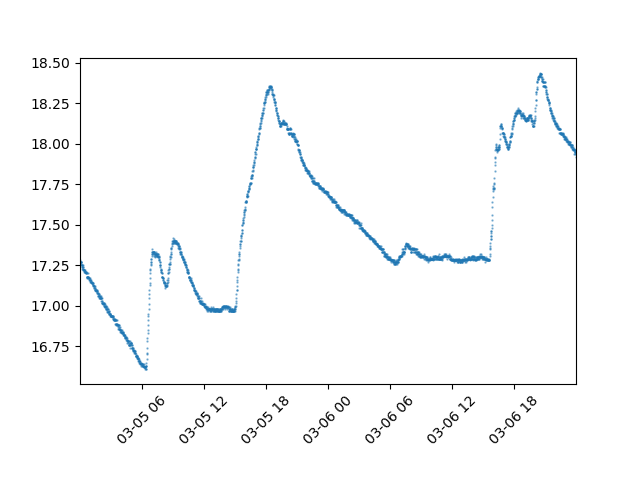

In [23]:
# let's zoom in a time period
period = ["5 Mar 2019", "7 Mar 2019"]
df_roombox = df_roombox[(df_roombox["roomtimestamp"] >= period[0]) 
                        & (df_roombox["roomtimestamp"] < period[1])]
plt.close()
plt.scatter(df_roombox["roomtimestamp"], df_roombox["roomtemperature"],
           s=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.xlim([df_roombox["roomtimestamp"].min(), df_roombox["roomtimestamp"].max()])
plt.subplots_adjust(bottom=0.2)

As visible in "homemodel", in room "Bedrooms0", there is 1 radiator box with 1 wireless valve.

The radiator surface temperature can be added on top in the plot.

In [24]:
df_rad1 = df_sensor_room[["radiator1surfacetemp",
                          "radiator1datastatus",
                          "radiator1timestamp"]]
df_rad1 = df_rad1[df_rad1["radiator1datastatus"] == "normal"]
df_rad1["radiator1timestamp"] = pd.to_datetime(df_rad1["radiator1timestamp"])
df_rad1 = df_rad1[(df_rad1["radiator1timestamp"] >= period[0]) 
                  & (df_rad1["radiator1timestamp"] < period[1])]
df_rad1

radiator1surfacetemp radiator1datastatus        radiator1timestamp
1101240                 17.88              normal 2019-03-05 00:00:30+00:00
1101241                 17.85              normal 2019-03-05 00:01:31+00:00
1101242                 17.85              normal 2019-03-05 00:02:31+00:00
1101243                 17.85              normal 2019-03-05 00:03:32+00:00
1101244                 17.85              normal 2019-03-05 00:04:32+00:00
...                       ...                 ...                       ...
1116115                 18.70              normal 2019-03-06 23:55:17+00:00
1116116                 18.70              normal 2019-03-06 23:56:18+00:00
1116117                 18.70              normal 2019-03-06 23:57:17+00:00
1116118                 18.70              normal 2019-03-06 23:58:18+00:00
1116119                 18.67              normal 2019-03-06 23:59:18+00:00

[2864 rows x 3 columns]

In [25]:
plt.close()
plt.scatter(df_roombox["roomtimestamp"], df_roombox["roomtemperature"],
           s=0.5, alpha=0.5, color="tab:blue", label="room temperature")
plt.scatter(df_rad1["radiator1timestamp"], df_rad1["radiator1surfacetemp"],
           s=0.5, alpha=0.5, color="tab:orange", label="radiator surface temperature")
plt.xticks(rotation=45)
plt.xlim([df_roombox["roomtimestamp"].min(), df_roombox["roomtimestamp"].max()])
plt.subplots_adjust(bottom=0.2)
plt.legend()

<IPython.core.display.Javascript object>

The radiator valve position can be added on top.

The valve position is between 0 (0%, closed) and 1 (100%, fully open). For visibility, we multiply this value by 10 in the plot.

In [26]:
df_wrv = df_sensor_room[["wrvswitchvariable",
                         "wrvdatastatus",
                         "wrvtimestamp"]]
df_wrv = df_wrv[df_wrv["wrvdatastatus"] == "normal"]
df_wrv["wrvtimestamp"] = pd.to_datetime(df_wrv["wrvtimestamp"])
df_wrv = df_wrv[(df_wrv["wrvtimestamp"] >= period[0]) 
                & (df_wrv["wrvtimestamp"] < period[1])]
df_wrv

wrvswitchvariable wrvdatastatus              wrvtimestamp
1101250                0.0        normal 2019-03-05 00:10:12+00:00
1101254                0.0        normal 2019-03-05 00:10:12+00:00
1101258                0.0        normal 2019-03-05 00:10:12+00:00
1101260                0.0        normal 2019-03-05 00:10:12+00:00
1101262                0.0        normal 2019-03-05 00:10:12+00:00
...                    ...           ...                       ...
1116105                0.0        normal 2019-03-06 23:41:19+00:00
1116107                0.0        normal 2019-03-06 23:41:19+00:00
1116109                0.0        normal 2019-03-06 23:41:19+00:00
1116113                0.0        normal 2019-03-06 23:41:19+00:00
1116117                0.0        normal 2019-03-06 23:41:19+00:00

[925 rows x 3 columns]

<IPython.core.display.Javascript object>


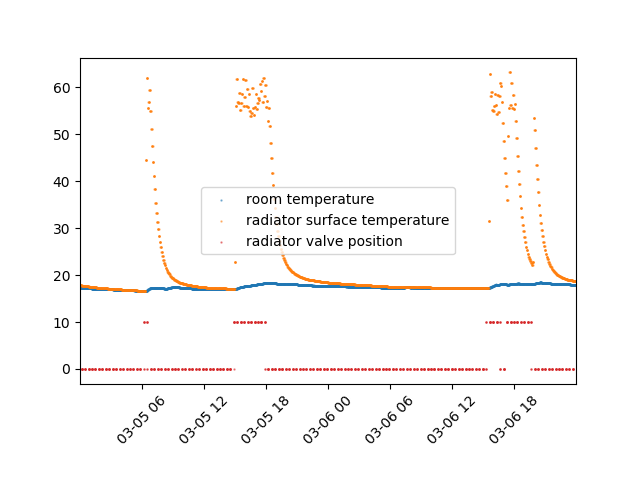

In [27]:
plt.close()
plt.scatter(df_roombox["roomtimestamp"], df_roombox["roomtemperature"],
           s=0.5, alpha=0.5, color="tab:blue", label="room temperature")
plt.scatter(df_rad1["radiator1timestamp"], df_rad1["radiator1surfacetemp"],
           s=0.5, alpha=0.5, color="tab:orange", label="radiator surface temperature")
plt.scatter(df_wrv["wrvtimestamp"], df_wrv["wrvswitchvariable"]*10,
           s=0.5, alpha=0.5, color="tab:red", label="radiator valve position")
plt.xticks(rotation=45)
plt.xlim([df_roombox["roomtimestamp"].min(), df_roombox["roomtimestamp"].max()])
plt.subplots_adjust(bottom=0.2)
plt.legend()

Instead of showing the numerical value, the valve status can be shown with colored bands

<IPython.core.display.Javascript object>


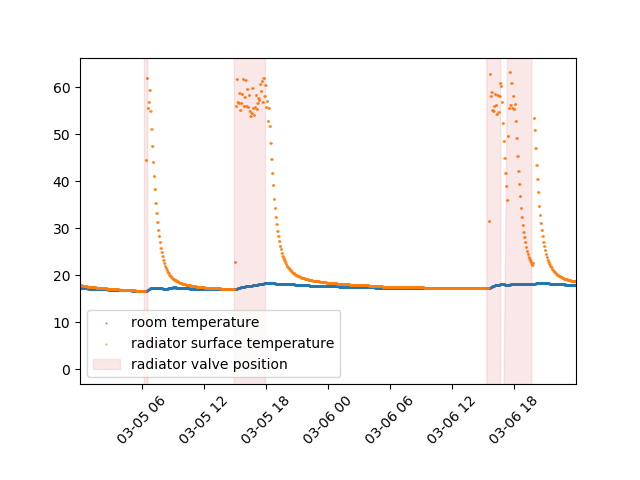

In [28]:
plt.close()
plt.scatter(df_roombox["roomtimestamp"], df_roombox["roomtemperature"],
           s=0.5, alpha=0.5, color="tab:blue", label="room temperature")
plt.scatter(df_rad1["radiator1timestamp"], df_rad1["radiator1surfacetemp"],
           s=0.5, alpha=0.5, color="tab:orange", label="radiator surface temperature")
plt.fill_between(df_wrv["wrvtimestamp"], [0]*len(df_wrv["wrvtimestamp"]), df_wrv["wrvswitchvariable"],
                 transform=plt.gca().get_xaxis_transform(),
                 alpha=0.1, color="tab:red", label="radiator valve position")
plt.xticks(rotation=45)
plt.xlim([df_roombox["roomtimestamp"].min(), df_roombox["roomtimestamp"].max()])
plt.subplots_adjust(bottom=0.2)
plt.legend()

## 6. Few methods to resample to different resolution

The temperature points are separated by ~1 minutes, depending on when the sensor device has sent the value.

With pandas, the timeseries can be resampled.

In [29]:
# the ambiant temperature can be resampled to 1-min resolution
df_1min_rb = df_roombox.set_index("roomtimestamp")
df_1min_rb = df_1min_rb.resample("1min").mean()

In [30]:
# the WRV status are ~20min resolution
df_1min_wrv = df_wrv.drop_duplicates()
df_1min_wrv = df_1min_wrv.set_index("wrvtimestamp")
# if the status is "1" at 10:34 and "0" at 10:54, all the values between 10:34 and 10:54 are set to "1"
df_1min_wrv = df_1min_wrv.resample("1min").mean().fillna(method="ffill")

In [31]:
# put the two together
df_1min = pd.concat([df_1min_rb, df_1min_wrv], axis=1)
# extend the status to the beginning and the end
df_1min = df_1min.fillna(method="ffill").fillna(method="bfill")
df_1min

roomtemperature  wrvswitchvariable
roomtimestamp                                                
2019-03-05 00:00:00+00:00            17.28                0.0
2019-03-05 00:01:00+00:00            17.27                0.0
2019-03-05 00:02:00+00:00            17.27                0.0
2019-03-05 00:03:00+00:00            17.27                0.0
2019-03-05 00:04:00+00:00            17.27                0.0
...                                    ...                ...
2019-03-06 23:55:00+00:00            17.96                0.0
2019-03-06 23:56:00+00:00            17.95                0.0
2019-03-06 23:57:00+00:00            17.95                0.0
2019-03-06 23:58:00+00:00            17.92                0.0
2019-03-06 23:59:00+00:00            17.94                0.0

[2880 rows x 2 columns]

It is worth noticing that one can resample such that the timestamp corresponds to the closest value at this time, or to the average during this time.

<IPython.core.display.Javascript object>


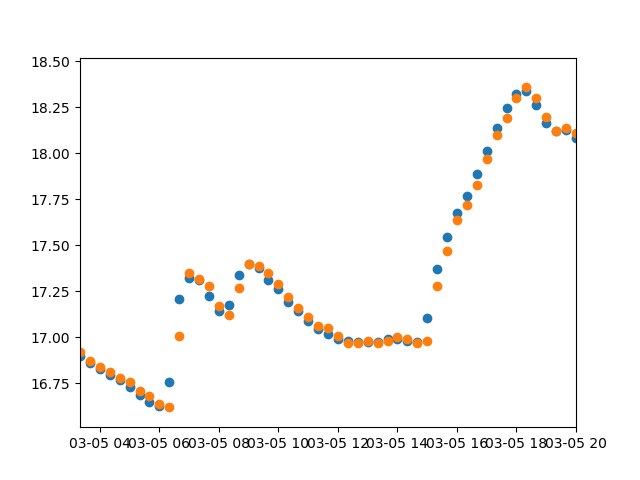

(737123.1388888889, 737123.8333333334)

In [32]:
df1 = df_1min.resample("20min").mean()
df2 = df_1min.resample("20min").first()
plt.close()
plt.scatter(df1.index, df1["roomtemperature"])
plt.scatter(df2.index, df2["roomtemperature"])
plt.xlim(df1.index[10], df1.index[60])